<a href="https://colab.research.google.com/github/BaruchMM/Analisis-de-articulos-estadisticos-usando-R/blob/main/algunos_algoritmos_para_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FastICA

In [2]:
install.packages('fastICA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(fastICA)

Definimos las señales $S_1(m)$ y $S_2(m)$ y con eso, definimos una matriz de combinación A que al aplicarlo a S, nos de $X$, tal que $$X=A \phantom{l}S$$

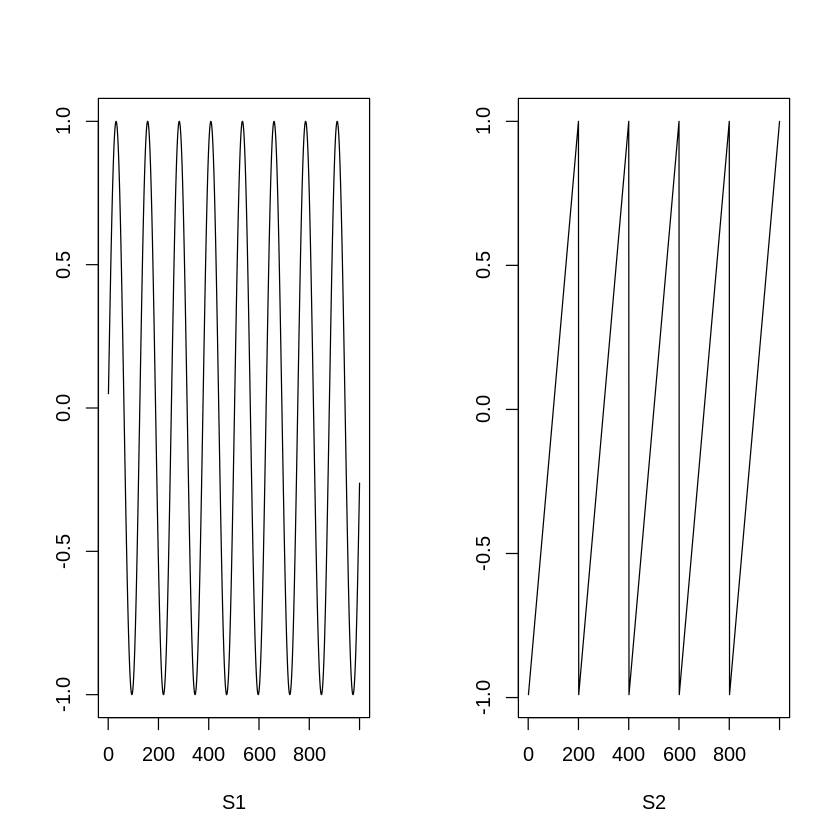

In [13]:
# Source matrix
S <- cbind(sin((1:1000)/20), rep((((1:200)-100)/100), 5))
# Mixing matrix
A <- matrix(c(0.291, 0.6557, -0.5439, 0.5572), 2, 2)
# plot graphs
par(mfcol = c(1, 2))
plot(1:1000, S[,1], type = "l",xlab = "S1", ylab = "")
plot(1:1000, S[,2], type = "l", xlab = "S2", ylab = "")

Aplicamos la matriz de combinación sobre $S$ para obtener $X$ y obtenemos las siguientes dos señales.

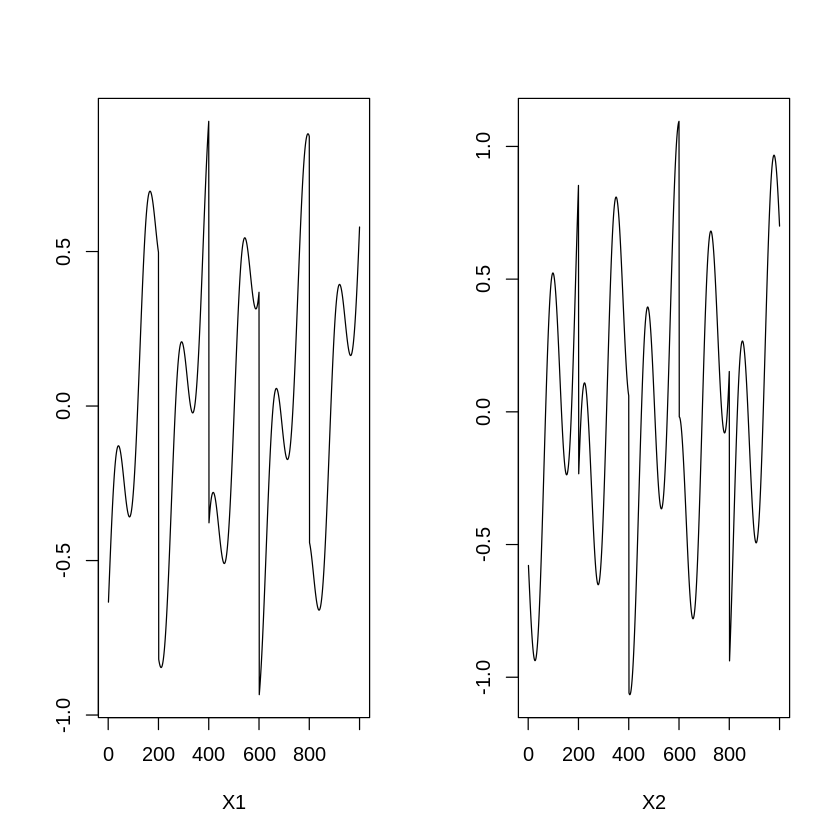

In [27]:
# Mixed two signals
X <- S %*% A

par(mfcol = c(1, 2))
plot(1:1000, X[,1], type = "l",xlab = "X1", ylab = "")
plot(1:1000, X[,2], type = "l", xlab = "X2", ylab = "")

A partir de aquí es donde se utiliza el FastICA. Suponiendo que tenemos la observación de $X$, podemos encontrar una aproximación numérica de la señal original S, utilizando la librería fastICA.

In [28]:
a <- fastICA(X, 2, alg.typ = "parallel", method = "R", row.norm = FALSE, 
              maxit = 200, tol = 0.0001, verbose = TRUE)

Centering

Whitening

Symmetric FastICA using logcosh approx. to neg-entropy function

Iteration 1 tol = 0.04821727

Iteration 2 tol = 1.454424e-05



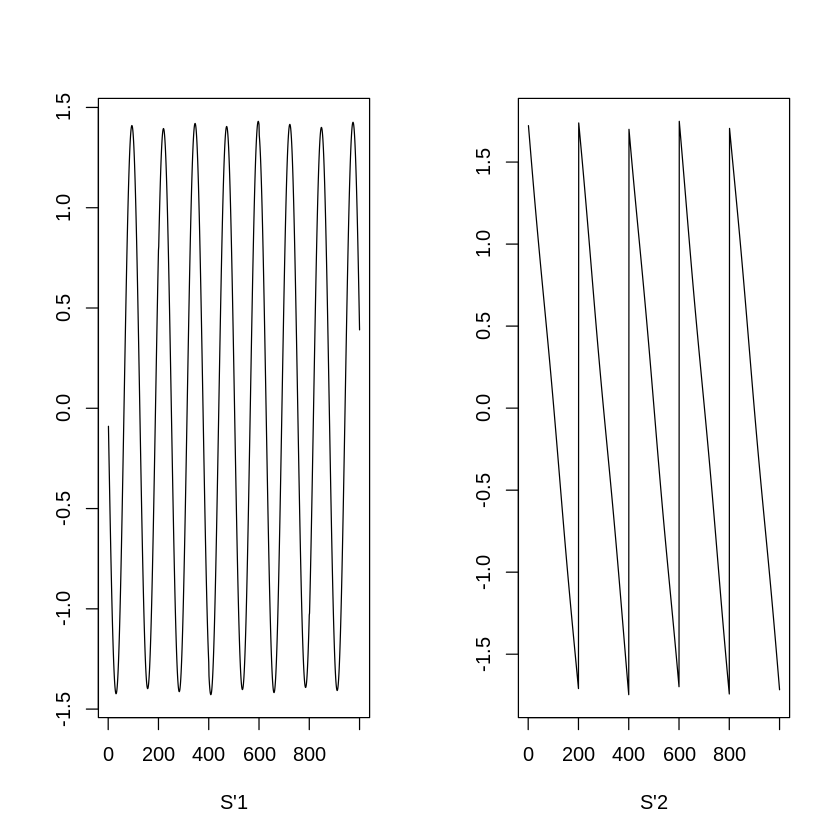

In [29]:
par(mfcol = c(1, 2))
plot(1:1000, a$S[,1], type = "l", xlab = "S'1", ylab = "")
plot(1:1000, a$S[,2], type = "l", xlab = "S'2", ylab = "")